In [1]:
import pandas as pd

# first, Energy Production

df = pd.read_csv('data/eia/MER_T01_02.csv')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# annualize
df_annual = df[df['YYYYMM'].astype('str').str.contains('\d{4}13$', regex=True)]

# get the year only in a column
s = df_annual['YYYYMM'].astype('str').str.replace(r'(\d{4})13$', r'\1', regex=True).astype('int')
s.name = 'YYYY'
df_annual = pd.concat([df_annual, s], axis='columns')

In [2]:
df_annual

,MSN,YYYYMM,Value,Column_Order,Description,Unit,YYYY
0,CLPRBUS,194913,11.973882,1,Coal Production,Quadrillion Btu,1949
1,CLPRBUS,195013,14.060135,1,Coal Production,Quadrillion Btu,1950
2,CLPRBUS,195113,14.419325,1,Coal Production,Quadrillion Btu,1951
3,CLPRBUS,195213,12.734313,1,Coal Production,Quadrillion Btu,1952
4,CLPRBUS,195313,12.277746,1,Coal Production,Quadrillion Btu,1953
...,...,...,...,...,...,...,...
8503,TEPRBUS,201613,84.316451,13,Total Primary Energy Production,Quadrillion Btu,2016
8516,TEPRBUS,201713,88.102915,13,Total Primary Energy Production,Quadrillion Btu,2017
8529,TEPRBUS,201813,95.748508,13,Total Primary Energy Production,Quadrillion Btu,2018
8542,TEPRBUS,201913,101.400918,13,Total Primary Energy Production,Quadrillion Btu,2019


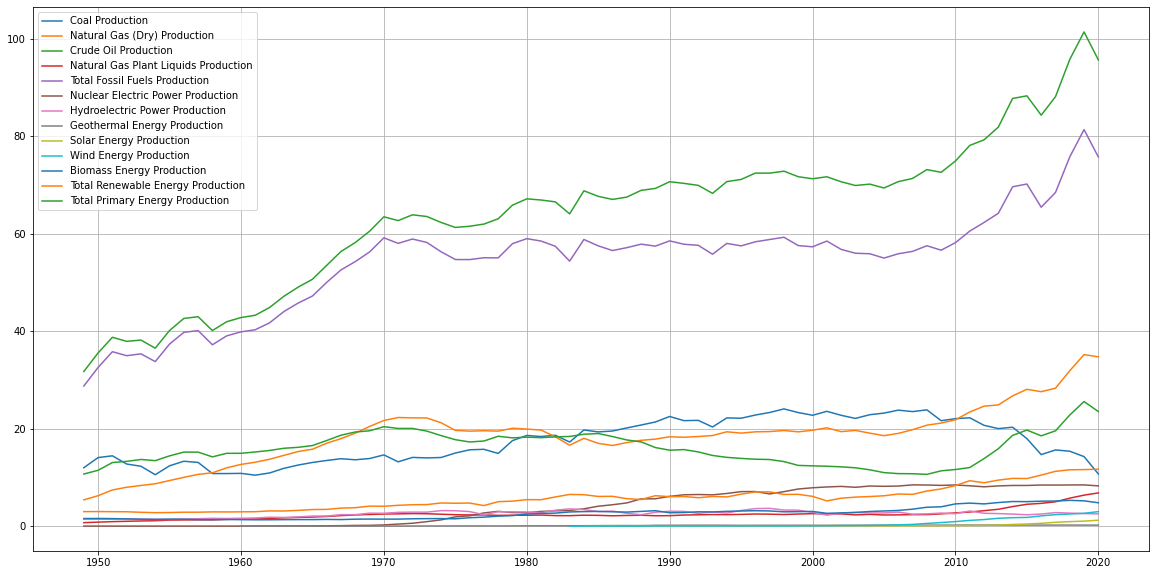

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
legend = []
for co in df_annual['Column_Order'].unique():
    df_sub = df_annual[df_annual['Column_Order'] == co]
    values = df_sub['Value'].astype('float').values
    years = df_sub['YYYY'].values

    ax.plot(years, values)
    legend.append(df_sub['Description'].values[0])
    
ax.legend(legend)
ax.grid()

In [4]:
# Next Consumption
df03 = pd.read_csv('data/eia/MER_T01_03.csv')
df03['Value'] = pd.to_numeric(df03['Value'], errors='coerce')

In [5]:
df03

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLTCBUS,194913,11.980905,1,Coal Consumption,Quadrillion Btu
1,CLTCBUS,195013,12.347109,1,Coal Consumption,Quadrillion Btu
2,CLTCBUS,195113,12.552996,1,Coal Consumption,Quadrillion Btu
3,CLTCBUS,195213,11.306479,1,Coal Consumption,Quadrillion Btu
4,CLTCBUS,195313,11.372684,1,Coal Consumption,Quadrillion Btu
...,...,...,...,...,...,...
7903,TETCBUS,202107,8.336143,12,Total Primary Energy Consumption,Quadrillion Btu
7904,TETCBUS,202108,8.480615,12,Total Primary Energy Consumption,Quadrillion Btu
7905,TETCBUS,202109,7.701909,12,Total Primary Energy Consumption,Quadrillion Btu
7906,TETCBUS,202110,7.693594,12,Total Primary Energy Consumption,Quadrillion Btu


In [6]:
# annualize
df03_annual = df03[df03['YYYYMM'].astype('str').str.contains('\d{4}13$', regex=True)]

# get the year only in a column
s = df03_annual['YYYYMM'].astype('str').str.replace(r'(\d{4})13$', r'\1', regex=True).astype('int')
s.name = 'YYYY'
df03_annual = pd.concat([df03_annual, s], axis='columns')

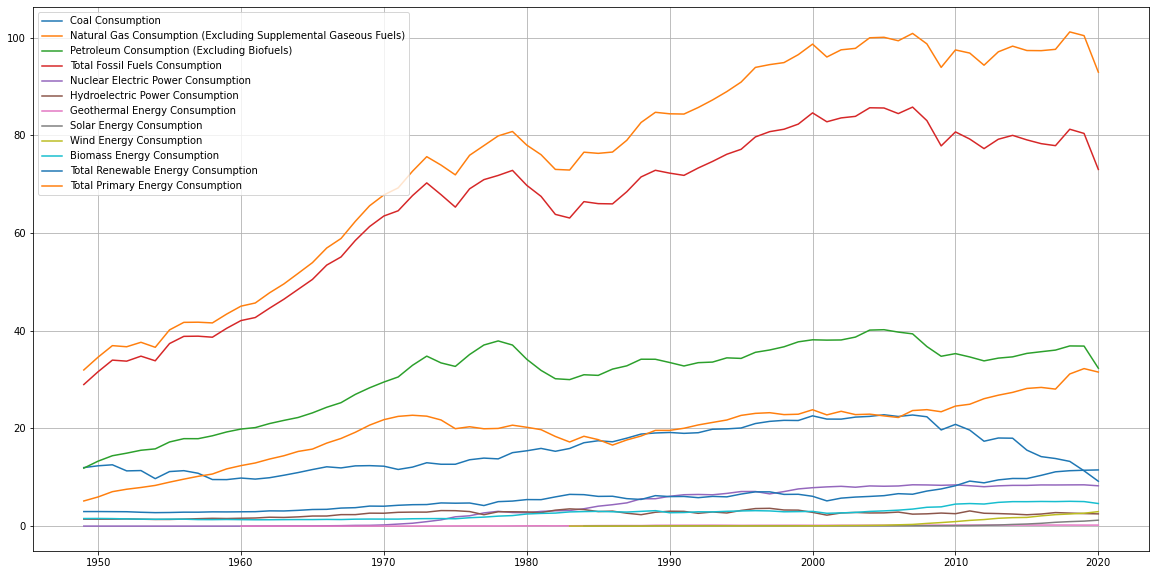

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
legend = []
for co in df03_annual['Column_Order'].unique():
    df_sub = df03_annual[df03_annual['Column_Order'] == co]
    values = df_sub['Value'].astype('float').values
    years = df_sub['YYYY'].values

    ax.plot(years, values)
    legend.append(df_sub['Description'].values[0])
    
ax.legend(legend)
ax.grid()

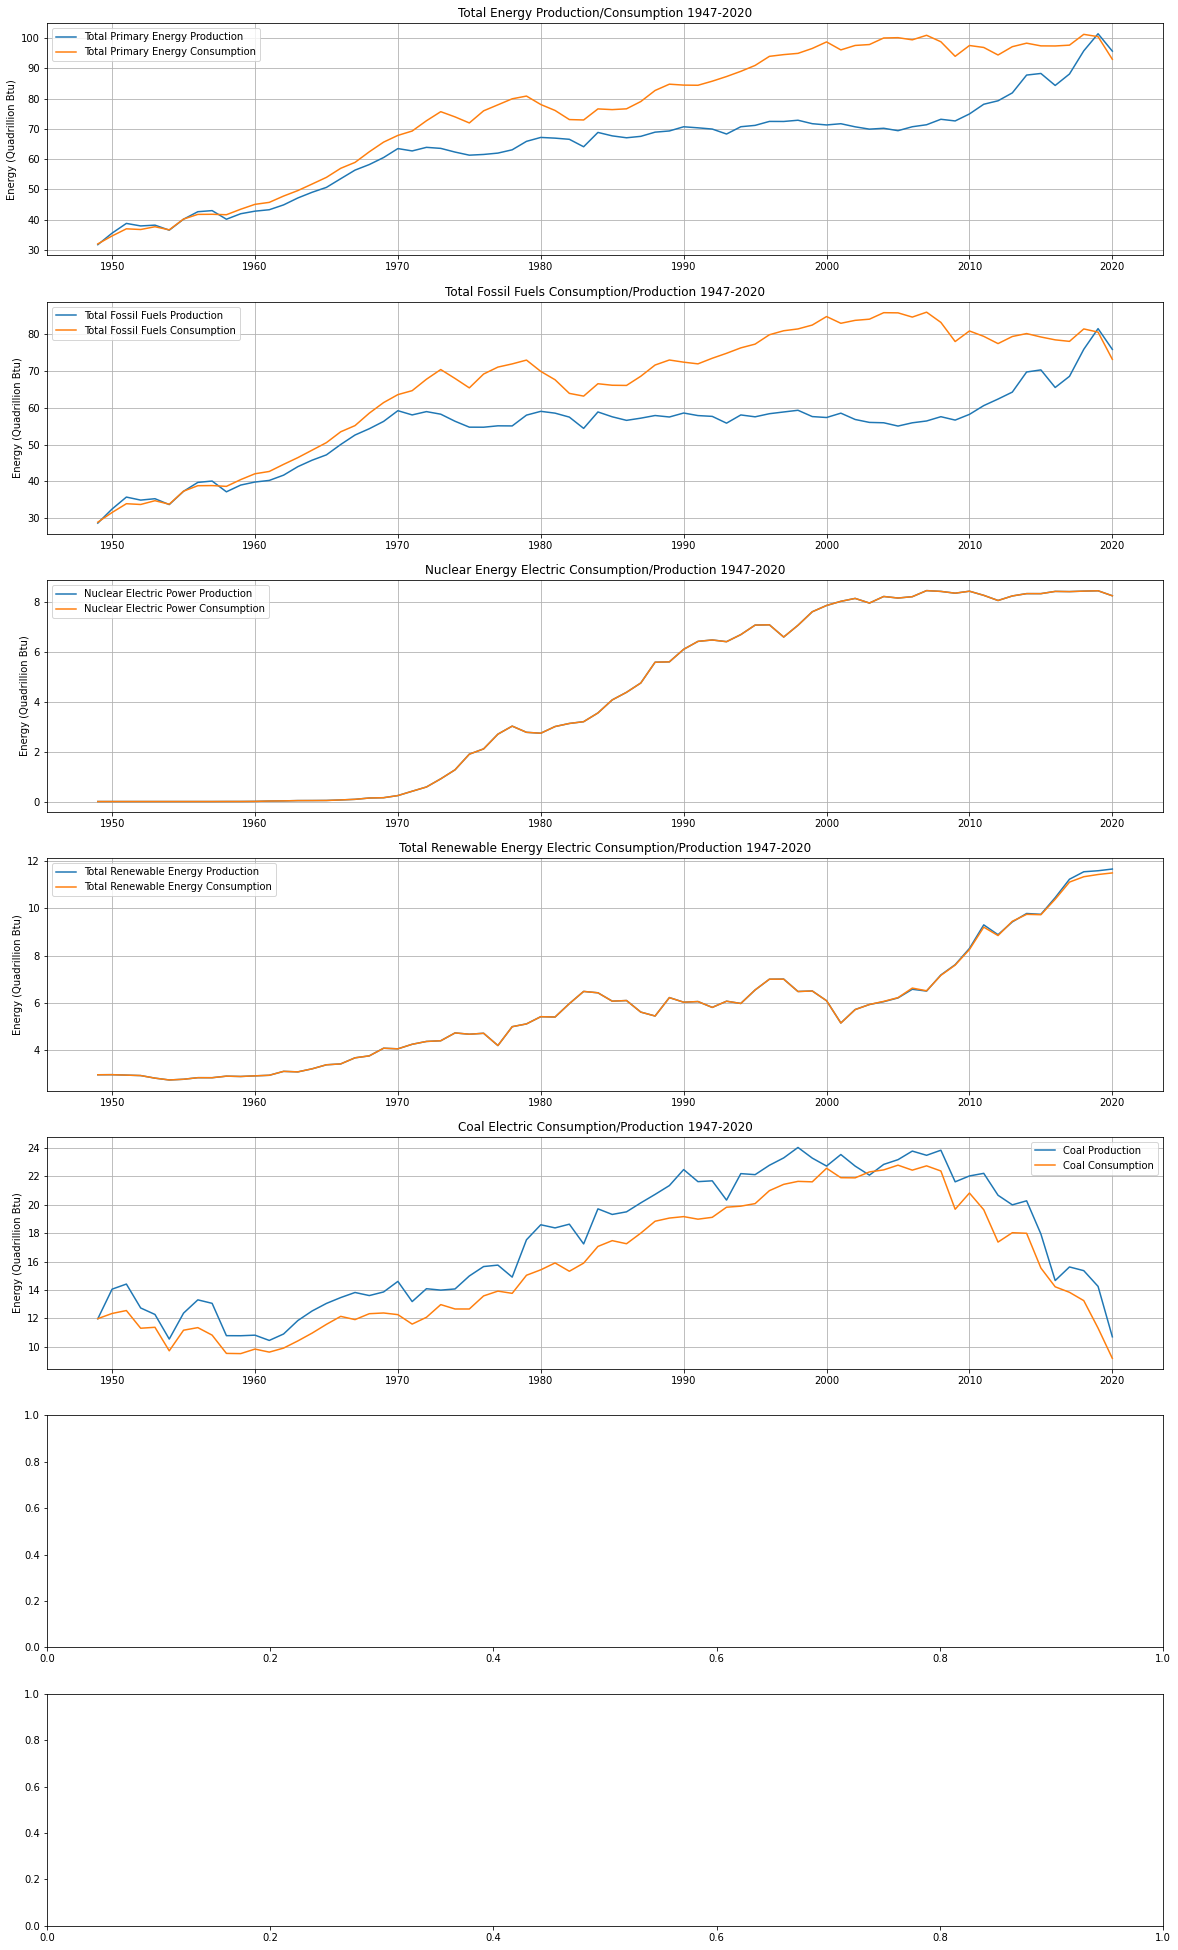

In [8]:
# Compare production to consumption
fig, axs = plt.subplots(7,1, figsize=(20, 35))


# Total Consumption/Production
df_sub_prod = df_annual[df_annual['Column_Order'] == 13]
df_sub_cons = df03_annual[df03_annual['Column_Order'] == 12]

values_prod = df_sub_prod['Value'].astype('float').values
values_cons = df_sub_cons['Value'].astype('float').values
years = df_sub['YYYY'].values

legend = []
axs[0].plot(years, values_prod)
axs[0].plot(years, values_cons)
legend.append(df_sub_prod['Description'].values[0])
legend.append(df_sub_cons['Description'].values[0])
title_units =  df_sub_cons['Unit'].values[0]
    
axs[0].legend(legend)
axs[0].set_title('Total Energy Production/Consumption 1947-2020')
axs[0].set_ylabel('Energy ({})'.format(title_units))
axs[0].grid()

# Total Fossil Fuels Consumption/Production
df_sub_prod = df_annual[df_annual['Column_Order'] == 5]
df_sub_cons = df03_annual[df03_annual['Column_Order'] == 4]

values_prod = df_sub_prod['Value'].astype('float').values
values_cons = df_sub_cons['Value'].astype('float').values
years = df_sub['YYYY'].values

legend = []
axs[1].plot(years, values_prod)
axs[1].plot(years, values_cons)
legend.append(df_sub_prod['Description'].values[0])
legend.append(df_sub_cons['Description'].values[0])

axs[1].legend(legend)
axs[1].set_title('Total Fossil Fuels Consumption/Production 1947-2020')
axs[1].set_ylabel('Energy ({})'.format(title_units))
axs[1].grid()

# Nuclear Energy Consumption/Production
df_sub_prod = df_annual[df_annual['Column_Order'] == 6]
df_sub_cons = df03_annual[df03_annual['Column_Order'] == 5]

values_prod = df_sub_prod['Value'].astype('float').values
values_cons = df_sub_cons['Value'].astype('float').values
years = df_sub['YYYY'].values

legend = []
axs[2].plot(years, values_prod)
axs[2].plot(years, values_cons)
legend.append(df_sub_prod['Description'].values[0])
legend.append(df_sub_cons['Description'].values[0])

axs[2].legend(legend)
axs[2].set_title('Nuclear Energy Electric Consumption/Production 1947-2020')
axs[2].set_ylabel('Energy ({})'.format(title_units))
axs[2].grid()

# Renewable Energy Consumption/Production
df_sub_prod = df_annual[df_annual['Column_Order'] == 12]
df_sub_cons = df03_annual[df03_annual['Column_Order'] == 11]

values_prod = df_sub_prod['Value'].astype('float').values
values_cons = df_sub_cons['Value'].astype('float').values
years = df_sub['YYYY'].values

legend = []
axs[3].plot(years, values_prod)
axs[3].plot(years, values_cons)
legend.append(df_sub_prod['Description'].values[0])
legend.append(df_sub_cons['Description'].values[0])

axs[3].legend(legend)
axs[3].set_title('Total Renewable Energy Electric Consumption/Production 1947-2020')
axs[3].set_ylabel('Energy ({})'.format(title_units))
axs[3].grid()

# Coal Energy Consumption/Production
df_sub_prod = df_annual[df_annual['Column_Order'] == 1]
df_sub_cons = df03_annual[df03_annual['Column_Order'] == 1]

values_prod = df_sub_prod['Value'].astype('float').values
values_cons = df_sub_cons['Value'].astype('float').values
years = df_sub['YYYY'].values

legend = []
axs[4].plot(years, values_prod)
axs[4].plot(years, values_cons)
legend.append(df_sub_prod['Description'].values[0])
legend.append(df_sub_cons['Description'].values[0])

axs[4].legend(legend)
axs[4].set_title('Coal Electric Consumption/Production 1947-2020')
axs[4].set_ylabel('Energy ({})'.format(title_units))
axs[4].grid()



In [9]:
# let's pull out the non-annualized (monthly) data into a separate df
df['record_date'] = df['YYYYMM'].astype(int).apply(lambda x: x % 100 != 13)
df_monthly = df[df['record_date'] == True]
df_monthly = df_monthly.drop(['record_date'], axis=1)

In [10]:
df_monthly.dtypes

MSN              object
YYYYMM            int64
Value           float64
Column_Order      int64
Description      object
Unit             object
dtype: object

In [11]:
df_monthly

,MSN,YYYYMM,Value,Column_Order,Description,Unit
24,CLPRBUS,197301,1.166486,1,Coal Production,Quadrillion Btu
25,CLPRBUS,197302,1.086072,1,Coal Production,Quadrillion Btu
26,CLPRBUS,197303,1.196571,1,Coal Production,Quadrillion Btu
27,CLPRBUS,197304,1.112230,1,Coal Production,Quadrillion Btu
28,CLPRBUS,197305,1.216978,1,Coal Production,Quadrillion Btu
...,...,...,...,...,...,...
8562,TEPRBUS,202107,8.294861,13,Total Primary Energy Production,Quadrillion Btu
8563,TEPRBUS,202108,8.357624,13,Total Primary Energy Production,Quadrillion Btu
8564,TEPRBUS,202109,7.996008,13,Total Primary Energy Production,Quadrillion Btu
8565,TEPRBUS,202110,8.342740,13,Total Primary Energy Production,Quadrillion Btu


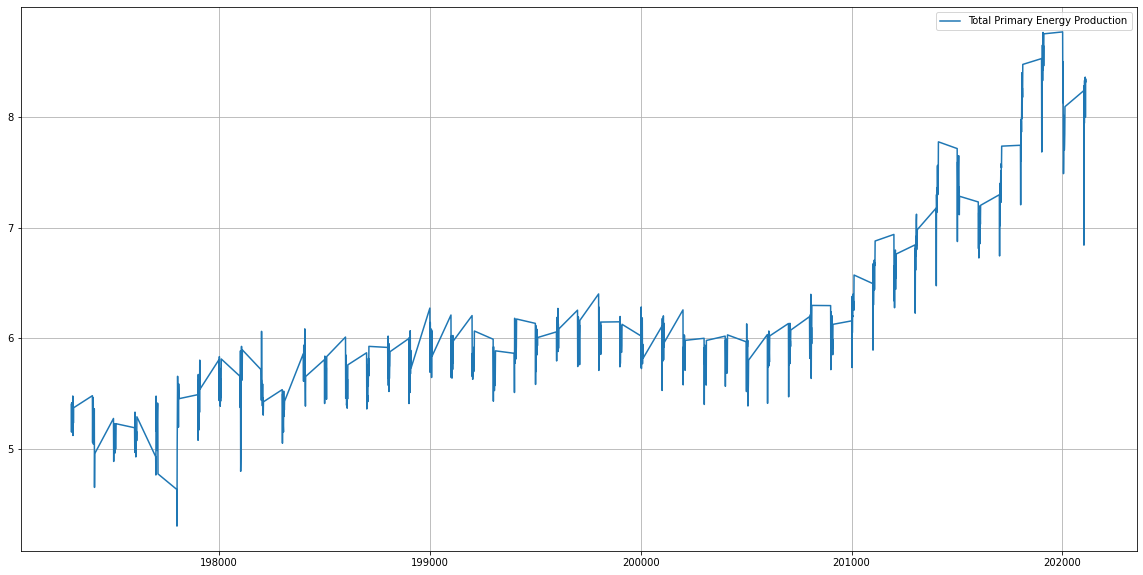

In [12]:
# total values
fig, ax = plt.subplots(figsize=(20, 10))
legend = []

df_sub = df_monthly[df_monthly['Column_Order'] == 13]
values = df_sub['Value'].astype('float').values
months = df_sub['YYYYMM'].values

ax.plot(months, values)
legend.append(df_sub['Description'].values[0])
    
ax.legend(legend)
ax.grid()

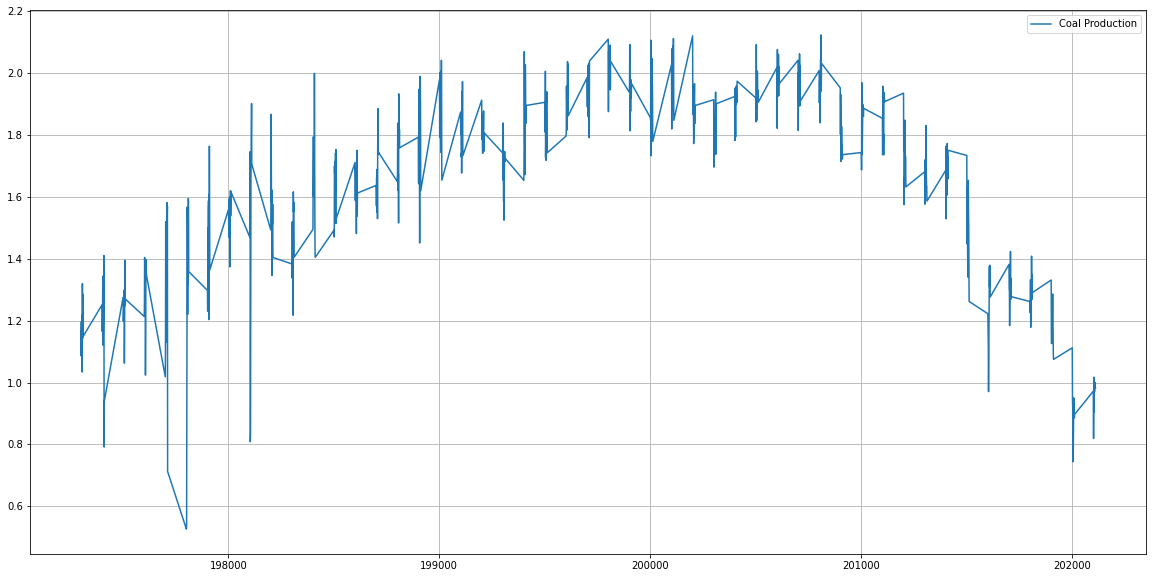

In [13]:
# total values

fig, ax = plt.subplots(figsize=(20, 10))

legend = []

df_sub = df_monthly[df_monthly['Column_Order'] == 1]
values = df_sub['Value'].astype('float').values
months = df_sub['YYYYMM'].values

ax.plot(months, values)
legend.append(df_sub['Description'].values[0])
ax.legend(legend)

ax.grid()

In [ ]:
# plotting autocorrelation  for annual total energy usage
def autocorr(samples, lag):
        l = len(samples)
        assert(lag < l)
        
        x_bar = np.mean(samples)
        xs = samples
        s = 0
        for i in range(len(xs)-lag):
            s+=(xs[i]-x_bar)*(xs[i+lag]-x_bar)
            
        xs_var2 = sum([(x-x_bar)**2 for x in xs])
        return s/xs_var2
    
# define the autocorrelation function
def acf(samples, lim=30):
    return [autocorr(samples, k+1) for k in list(range(lim))]

def plot_acf(samples, lim=30):
    
